# 1. Getting the data

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
mylist = []

for chunk in  pd.read_csv('flights.csv', sep=',', chunksize=20000):
    mylist.append(chunk)

df_flights = pd.concat(mylist, axis= 0)
del mylist

In [4]:
df_airlines =pd.read_csv('airlines.csv')
df_airports = pd.read_csv('airports.csv')

In [5]:
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
df_airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [7]:
#find the unique values of the column CANCELLED
df_flights.CANCELLED.unique()

array([0, 1], dtype=int64)

In [8]:
#print the cancelled flights
#cancellation reason
# (A) Air Carrier;
# (B) Extreme Weather;
# (C) National Aviation System (NAS); and
# (D) Security.
df_flights[df_flights['CANCELLED']==1]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,200,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,5254,N746SK,MAF,IAH,510,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,525,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,5460,N583SW,RDD,SFO,530,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,2015,12,31,4,UA,1789,NaN,IAH,TPA,1955,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818157,2015,12,31,4,UA,222,NaN,SFO,LAX,2000,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,AA,2245,N880AA,MIA,SAN,2019,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,NK,416,N522NK,FLL,IAG,2155,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [9]:
#finding the total cancelled flights for each airline
cancelled_flights_for_airline = df_flights[df_flights['CANCELLED']==1].groupby('AIRLINE')['CANCELLED'].count()

In [10]:
cancelled_flights_for_airline.sort_values(ascending=False, inplace=True)

In [11]:
cancelled_flights_for_airline

AIRLINE
WN    16043
EV    15231
MQ    15025
AA    10919
OO     9960
UA     6573
B6     4276
US     4067
DL     3824
NK     2004
AS      669
F9      588
VX      534
HA      171
Name: CANCELLED, dtype: int64

In [12]:
df_airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [13]:
df_cancelled_flights_for_airline = pd.DataFrame(cancelled_flights_for_airline)
df_cancelled_flights_for_airline = df_cancelled_flights_for_airline.join(df_airlines.set_index('IATA_CODE'), on='AIRLINE').sort_values(by='CANCELLED', ascending=False)
df_cancelled_flights_for_airline

,CANCELLED,AIRLINE
AIRLINE,,
WN,16043,Southwest Airlines Co.
EV,15231,Atlantic Southeast Airlines
MQ,15025,American Eagle Airlines Inc.
AA,10919,American Airlines Inc.
OO,9960,Skywest Airlines Inc.
UA,6573,United Air Lines Inc.
B6,4276,JetBlue Airways
US,4067,US Airways Inc.
DL,3824,Delta Air Lines Inc.


In [14]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [15]:
df_flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [16]:
df_flights['DEPARTURE_DELAY'].replace(np.nan, 0, inplace=True)
df_flights['ARRIVAL_DELAY'].replace(np.nan, 0, inplace=True)
df_flights['AIR_SYSTEM_DELAY'].replace(np.nan, 0, inplace=True)
df_flights['SECURITY_DELAY'].replace(np.nan, 0, inplace=True)
df_flights['AIRLINE_DELAY'].replace(np.nan, 0, inplace=True)
df_flights['LATE_AIRCRAFT_DELAY'].replace(np.nan, 0, inplace=True)
df_flights['WEATHER_DELAY'].replace(np.nan, 0, inplace=True)

In [17]:
#print the iata_code airport of the state FL
iata_florida = df_airports[df_airports['STATE']=='FL']['IATA_CODE'].tolist()

In [18]:
df_flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [19]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [15]:
df_airports.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [21]:
corr = df_flights.corr()

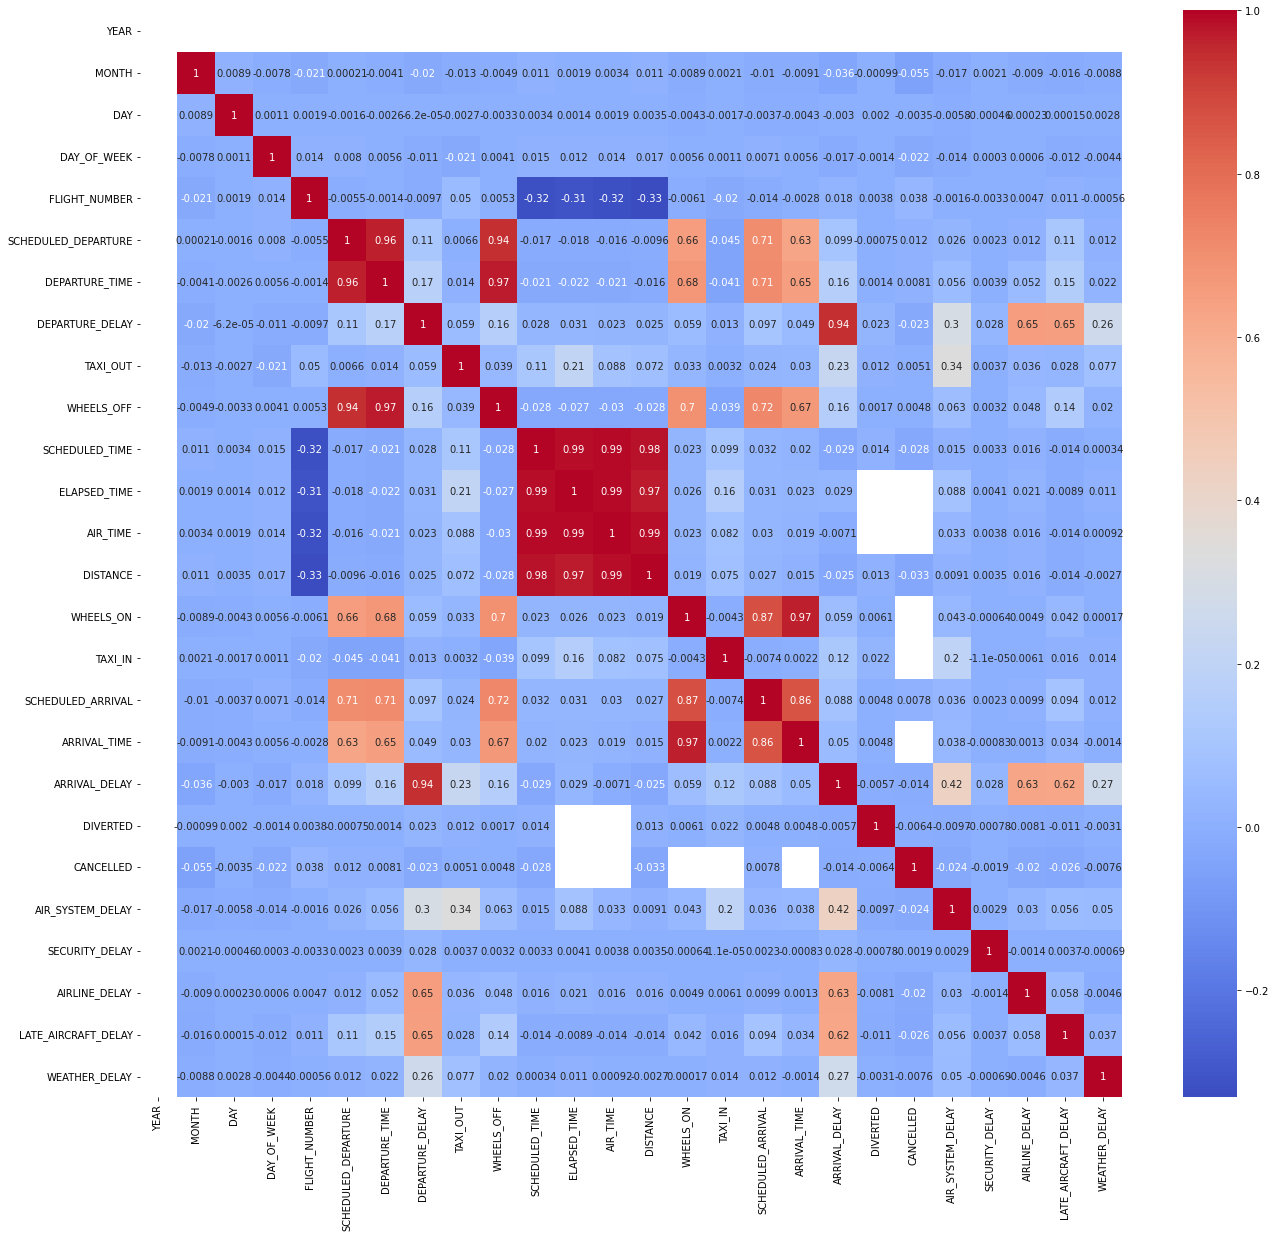

In [22]:
plt.figure(figsize=(22,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## 2.1 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [593]:
df2['fuel_type'].replace(['gas', 'diesel'], [0, 1], inplace=True)
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


## 2.2 : Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [594]:
x = df2.drop(['fuel_type'], axis=1)
y = df2['fuel_type']

## 2.3 Split your data into training and testing set. Use test_size=0.3, random_state=746 !

In [595]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 746)

# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

In [597]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


c:\Users\coraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix

In [598]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[50  0]
 [ 0  9]]


AUC

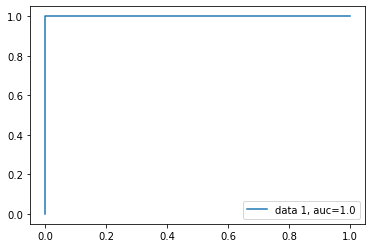

In [599]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Classification report

In [600]:
#report classification
column_names = ['gas', 'diesel']
print(classification_report(y_test, y_pred, target_names=column_names))

              precision    recall  f1-score   support

         gas       1.00      1.00      1.00        50
      diesel       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [601]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 746)

In [602]:
model = GaussianNB()
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of Naive Bayes classifier on test set: 1.00


Confusion matrix

In [603]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[50  0]
 [ 0  9]]


AUC

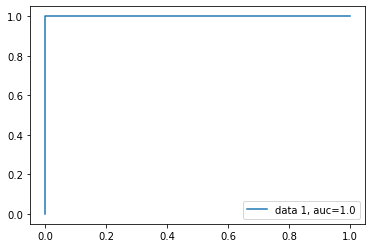

In [604]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Classification report

In [605]:
column_names = ['gas', 'diesel']
print(classification_report(y_test, y_pred, target_names=column_names))

              precision    recall  f1-score   support

         gas       1.00      1.00      1.00        50
      diesel       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC

Minimum error: 0.11864406779661017 at K = 3


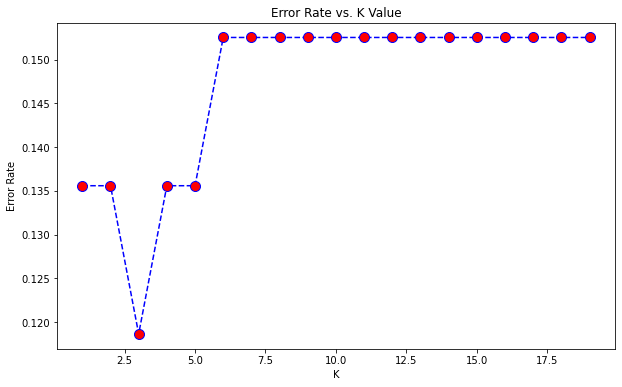

In [606]:
error_rate = []
for i in range(1,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: {} at K = {}".format(min(error_rate), error_rate.index(min(error_rate)) +1))

The bes K for this model in this case will be K = 3

In [607]:
#Train Model and Predict
k = 3 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred = neigh.predict(X_test)
y_pred_proba = neigh.predict_proba(X_test)[::,1]
print("Accuracy of model at K = {} is: {}".format(k, metrics.accuracy_score(y_test, y_pred)))

Accuracy of model at K = 3 is: 0.8813559322033898


Confusion matrix

In [608]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[49  1]
 [ 6  3]]


Classification report

In [609]:
column_names = ['gas', 'diesel']
print(classification_report(y_test, y_pred, target_names=column_names))

              precision    recall  f1-score   support

         gas       0.89      0.98      0.93        50
      diesel       0.75      0.33      0.46         9

    accuracy                           0.88        59
   macro avg       0.82      0.66      0.70        59
weighted avg       0.87      0.88      0.86        59



AUC

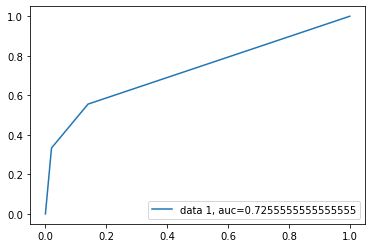

In [610]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

In [611]:
# Instantiate model with 100 decision trees
clf = RandomForestClassifier(n_estimators = 100)
# Train the model on training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [612]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[::,1]

In [613]:
print("Accuracy of model is: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of model is: 1.0


Confusion matrix

In [614]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[50  0]
 [ 0  9]]


Classification report

In [615]:
column_names = ['gas', 'diesel']
print(classification_report(y_test, y_pred, target_names=column_names))

              precision    recall  f1-score   support

         gas       1.00      1.00      1.00        50
      diesel       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



AUC

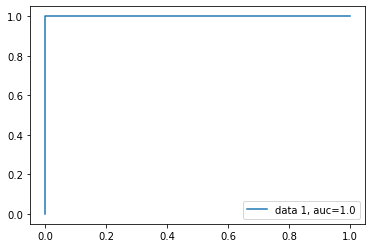

In [616]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 3.5 Compare your results and comment on your findings. Which one(s) did the best job? What could have been the problem with the ones that did not work? etc.

- Logistic regression, Accuracy of logistic regression classifier on test set: 1.00
- Naive Bayes, Accuracy of Naive Bayes classifier on test set: 1.00
- KNN, Accuracy of model at K = 3 is: 0.8813559322033898
- Random Forest, Accuracy of model is: 1.0

- the logistic regression, Naive Bayes and Random Forest did the best job, with an accuracy of 100%
- the Logistic regression, did not work because you need to normalize the data to use it in the model

## 4. Bonus question
**Try to fix the imbalanced nature of the data with a tool from the lecture. Run one of the classification methods (preferably one that "failed" before) and see if you get better results.**

In [617]:
df2.fuel_type.value_counts()

0    175
1     20
Name: fuel_type, dtype: int64

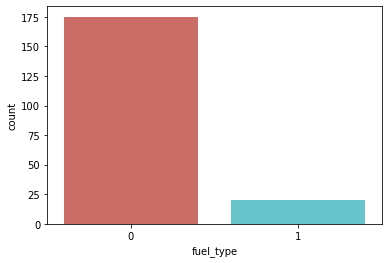

In [618]:
sns.countplot(x='fuel_type', data=df2, palette='hls')
plt.show()

In [619]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [624]:
logreg = LogisticRegression()
logreg.fit(X_res, y_res)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


c:\Users\coraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


in this case we create more datas for X_train and y_train. But we get the exact same result, Accuracy of logistic regression classifier on test set: 1.00, and the warning is still there